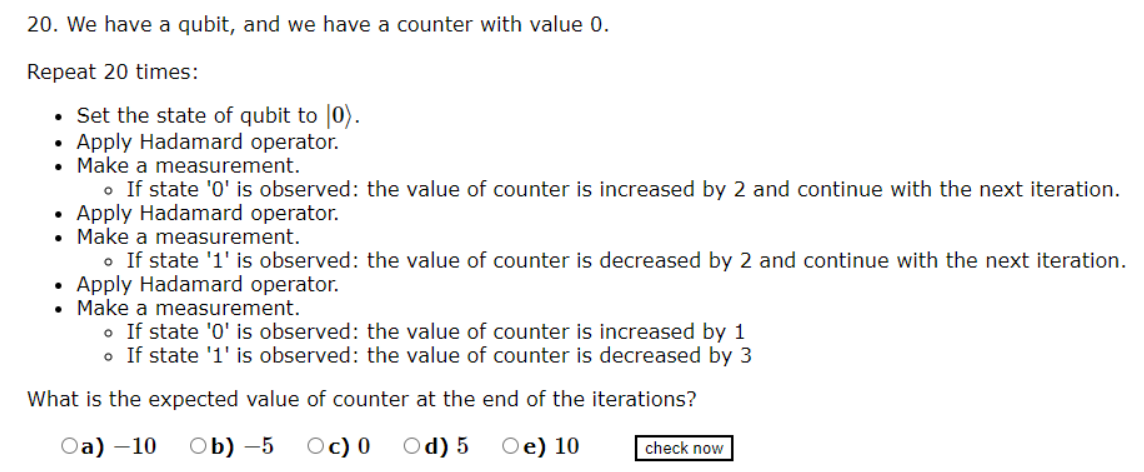

# Expected value calculation using pen and paper (Probability tree)



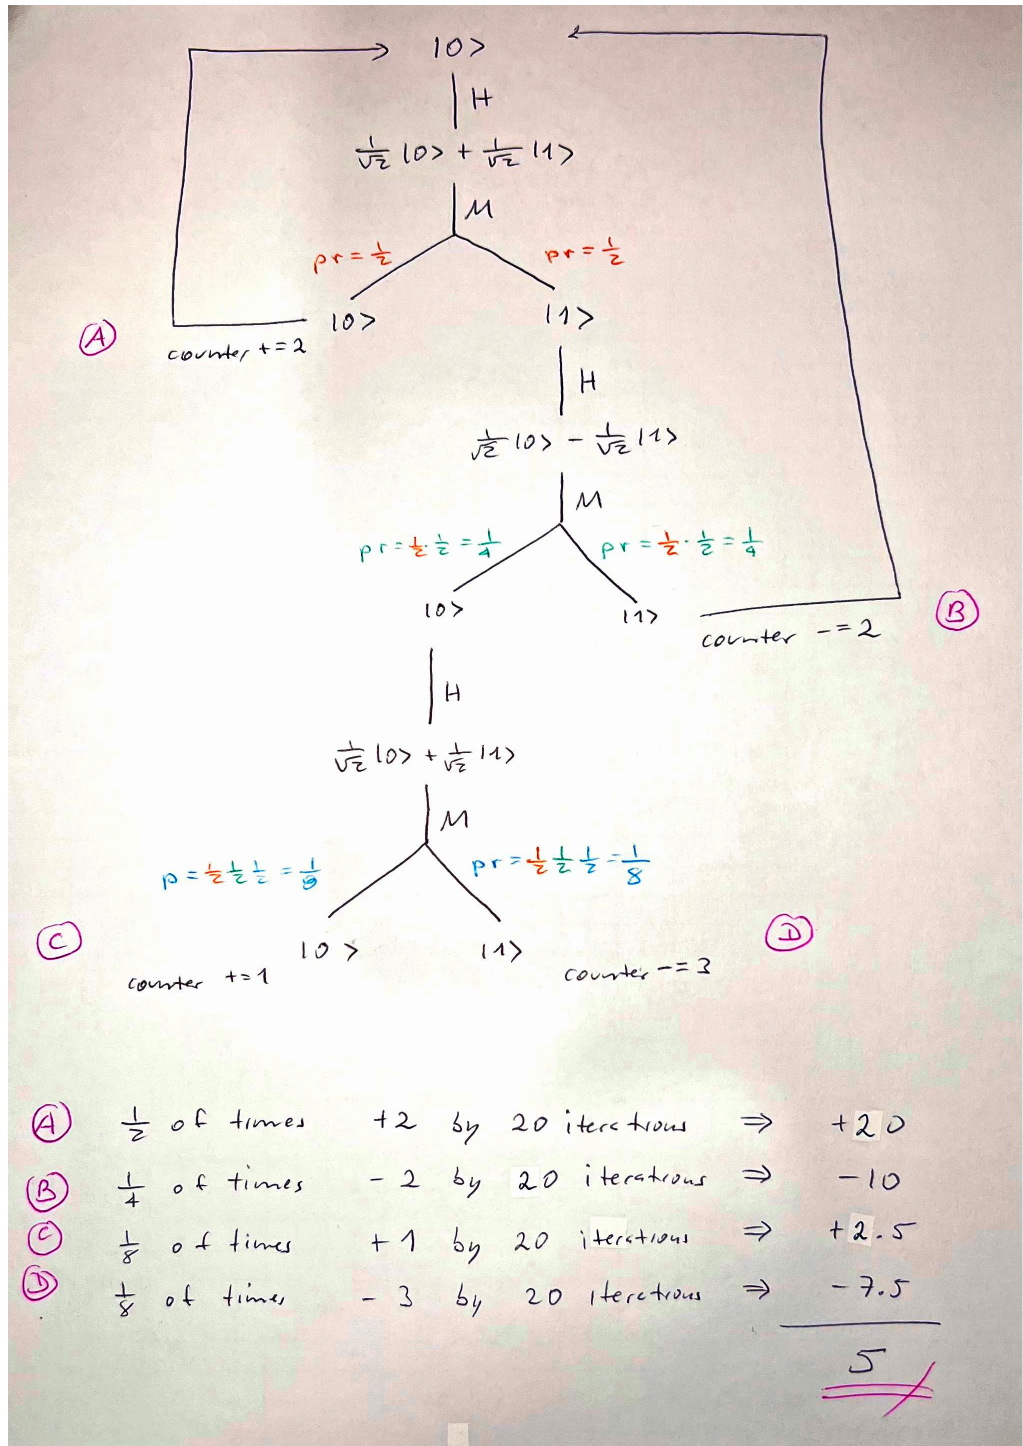

# Designing Qiskit Program to _simulate_ this on Qasm Simulator:

### Warning: 
This might take some time beacause the complexity of the program is Cubic: 
`1000 Iterations * 20 Loops * 3 Sub steps ~= Order of 1 Million` 



In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
import numpy as np


# First Create Registers
q = QuantumRegister(1,"q")
c = ClassicalRegister(1,"c")

# Create circuit 
qc = QuantumCircuit(q,c)

total_tests = 1000
counter = 0

for test in range(total_tests):
    
    for i in range(20):
        q = QuantumRegister(1, "q")
        c = ClassicalRegister(1, "c")
        qc = QuantumCircuit(q, c)

        qc.h(q[0])
        qc.measure(q[0],c[0])
        job = execute(qc, backend=Aer.get_backend("statevector_simulator"), shots=1)
        counts = job.result().get_counts()
        if counts.get('0') == 1: 
            counter += 2
            continue              #continue with inner loop (20 iter)

        qc.h(q[0])
        qc.measure(q[0],c[0])
        job = execute(qc, backend=Aer.get_backend("statevector_simulator"), shots=1)
        counts = job.result().get_counts()
        if counts.get('1') == 1:
            counter -= 2
            continue              #continue with inner loop (20 iter)

        qc.h(q[0])
        qc.measure(q[0],c[0])
        job = execute(qc, backend=Aer.get_backend("statevector_simulator"), shots=1)
        counts = job.result().get_counts()    

        if counts.get('0') == 1:
            counter += 1
        if counts.get('1') == 1:
            counter -= 3

print(counter/total_tests)

4.649


# Conclusion: 
The simulated result converge towards expected probability. 


# Excercise 2: 

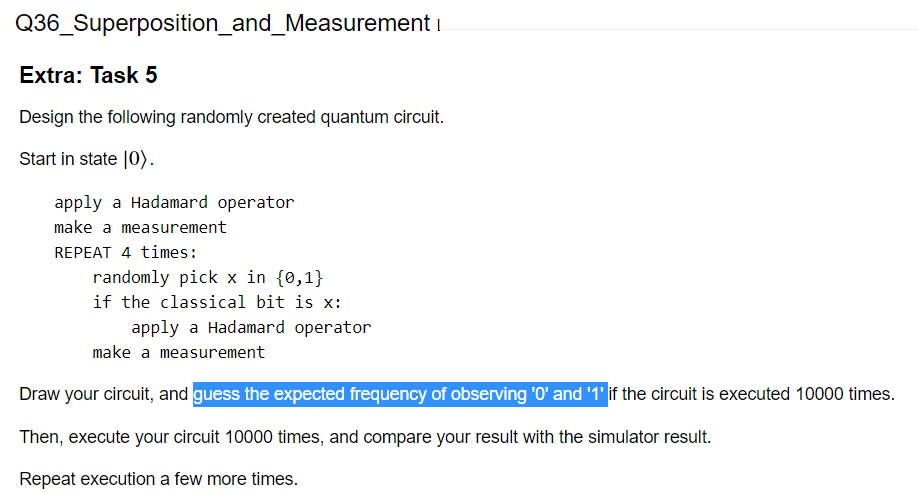

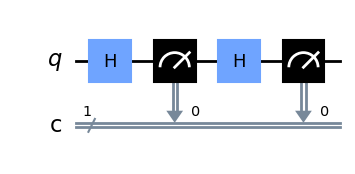

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
import numpy as np 

q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')

qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.measure(q[0],c[0])

shot_outcome = 0

for i in range (4):
    
    job = execute(experiments=qc, backend=Aer.get_backend("statevector_simulator"), shots=1)
    counts = job.result().get_counts()
    for key in counts:
        shot_outcome = int(key)
    
    x = int(np.random.randint(low=0, high=2, size=1)[0])
    
    #print("x = ",x, " shot_outcome = ", shot_outcome)
    #print("type(x): ", type(x), " type(shot_outcome): ", type(shot_outcome))
    
    if x == shot_outcome:
        #print("x and shot_outcome are equal so apply H")
        qc.h(q[0])
        #qc.barrier()
        qc.measure(q[0],c[0])

qc.draw("mpl")

In [7]:
job = execute(experiments=qc, backend=Aer.get_backend("statevector_simulator"), shots=10000)
counts = job.result().get_counts()
print(counts)

{'0': 5025, '1': 4975}
